Exploration 4) Viability and application as a financial or portfolio management tool.

Now that we have somewhat established Bitcoin as a "storage of value" similar to an asset.  Can we find any relationships between Bitcoin and traditional financial assets such as stocks, bonds, hedging strategies or commodities? 

I will be looking and analyzing financial markets data (from a performance perspective) to uncover possible insights.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

%matplotlib inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20,10)

font = {'family' : 'sans-serif',
        'weight' : 'medium',
        'size'   : 18}

matplotlib.rc('font', **font)


In [2]:
# importing data, will begin looking at BTC vs. VIX Index
# loading in Bitcoin prices

BTC_px = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\market-price.csv''',
                         header=None, parse_dates=True, index_col=[0]).dropna()
BTC_px.columns = ['Price']
BTC_px.tail()

,Price
0,
2018-02-17,10841.991667
2018-02-19,11110.965000
2018-02-21,10532.791667
2018-02-23,10162.116667
2018-02-25,9696.593333


In [3]:
# The VIX is the Chicago Board of Exchange's Volatility Index, a popular measure of stock market volatility
# Often referred to as the "Fear Index", it is often used to gauge stock market sentiment and used as a hedging strategy


VIX = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\vixcurrent.csv''',
                         header=1, parse_dates=['Date'], index_col='Date')

VIX = VIX[1259:]
VIX.head()

,VIX Open,VIX High,VIX Low,VIX Close
Date,,,,
2009-01-02,39.58,39.82,36.88,39.19
2009-01-05,39.24,40.22,38.30,39.08
2009-01-06,38.06,39.33,37.34,38.56
2009-01-07,40.29,43.82,40.12,43.39
2009-01-08,43.38,44.60,42.56,42.56


In [4]:
BTC_vol = pd.merge(BTC_px, VIX, left_index=True, right_index=True)
BTC_vol.dropna()
BTC_vol = BTC_vol[203:]# adjusting dataframe as BTC price history begins on 8/17/2010
BTC_vol.head()

,Price,VIX Open,VIX High,VIX Low,VIX Close
2010-08-18,0.074000,24.30,25.23,23.40,24.59
2010-08-20,0.066700,26.73,27.00,25.49,25.49
2010-08-24,0.066889,27.91,28.77,26.32,27.46
2010-08-26,0.066499,26.45,27.55,25.86,27.37
2010-08-30,0.069000,25.88,27.21,25.41,27.21


In [5]:
# creating Return Columns
BTC_vol['BTC_TR'] = (BTC_vol['Price']/0.074)
BTC_vol['VIX_TR'] = (BTC_vol['VIX Close']/24.59)

BTC_vol.head()

,Price,VIX Open,VIX High,VIX Low,VIX Close,BTC_TR,VIX_TR
2010-08-18,0.074000,24.30,25.23,23.40,24.59,1.000000,1.000000
2010-08-20,0.066700,26.73,27.00,25.49,25.49,0.901351,1.036600
2010-08-24,0.066889,27.91,28.77,26.32,27.46,0.903905,1.116714
2010-08-26,0.066499,26.45,27.55,25.86,27.37,0.898635,1.113054
2010-08-30,0.069000,25.88,27.21,25.41,27.21,0.932432,1.106547


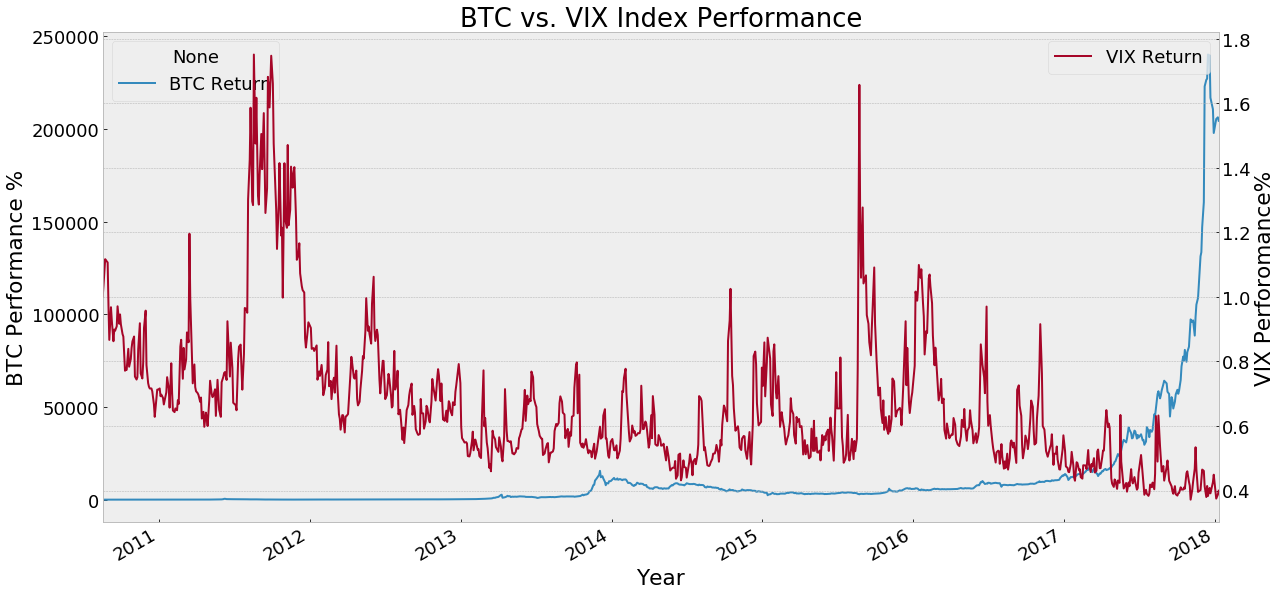

In [6]:
# plotting the time series data Bitcoin returns vs. return on the VIX Index

BTC_vol.BTC_TR.plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Return'])
BTC_vol.VIX_TR.plot(secondary_y=True)
plt.title('BTC vs. VIX Index Performance')
plt.ylabel('VIX Perforomance%')
plt.legend(['VIX Return'])

plt.show()

To augment this analysis, I would like to plot the above data in the scope of only August 2017 (approximately when search interest for Bitcoin began to climb to record levels.  

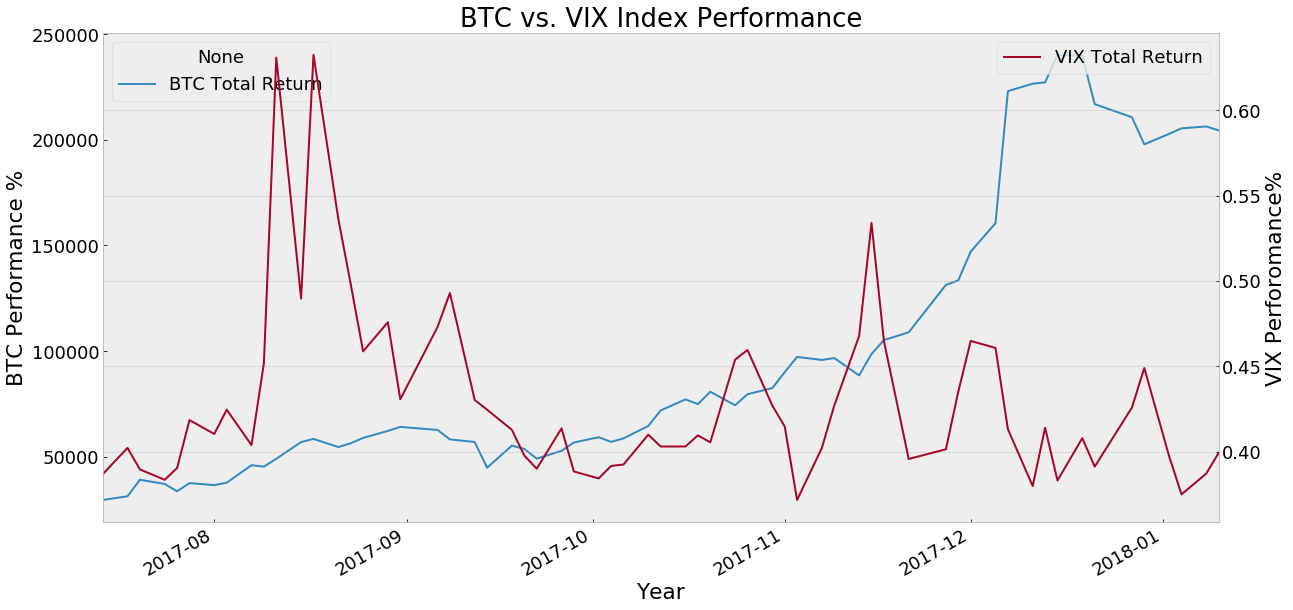

In [7]:
# it appears there may be an inverse relationship that is more visible after August 2017

BTC_vol.BTC_TR[875:].plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Total Return'])
BTC_vol.VIX_TR[875:].plot(secondary_y=True)
plt.title('BTC vs. VIX Index Performance')
plt.ylabel('VIX Perforomance%')
plt.legend(['VIX Total Return'])

plt.show()

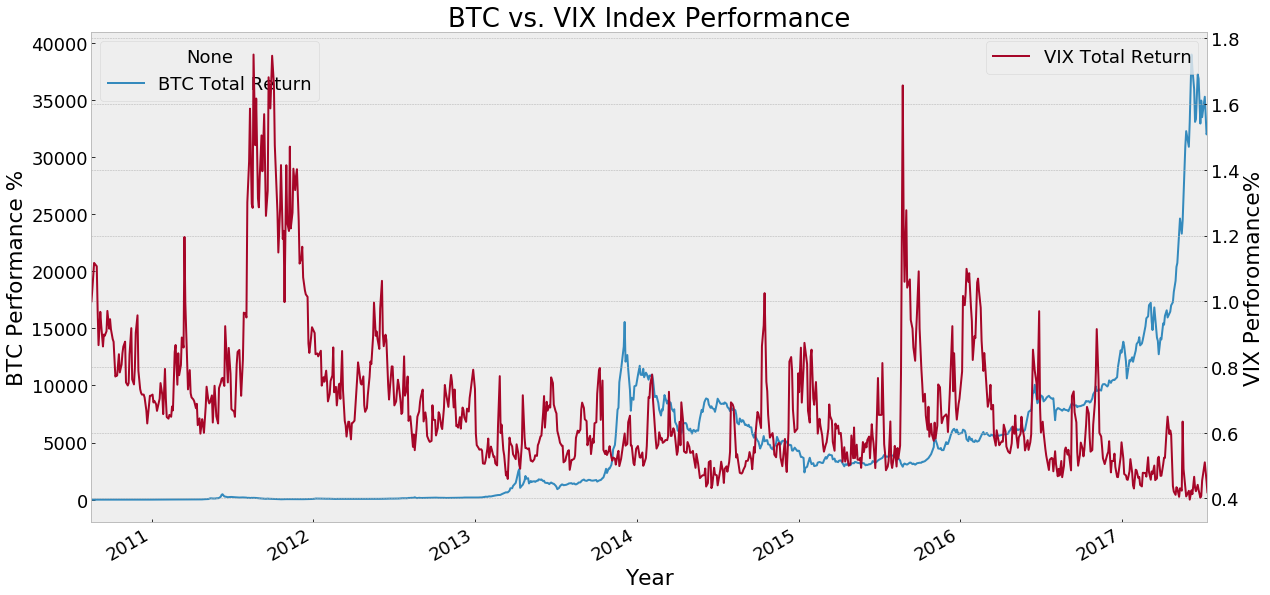

In [8]:
# what about before August 2017?


BTC_vol.BTC_TR[:875].plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Total Return'])
BTC_vol.VIX_TR[:875].plot(secondary_y=True)
plt.title('BTC vs. VIX Index Performance')
plt.ylabel('VIX Perforomance%')
plt.legend(['VIX Total Return'])

plt.show()

Since late 2010, the VIX has actually underperformed and lost nearly half its value going into 2018. This suggests that "fear" in the equities market has dissapated over time since the Great Recession.  We do see a few instances where the VIX spikes in 2011 and in 2015.  2011's spike was due to concerns of contagion in the European Sovereign Debt Crisis, sending turmoil throughout global equities markets.  2015 was due to concerns of a slowing China economy and an imminent FOMC rate hike (the first since 2006).  

It does not appear there is any correlation/relationship between Bitcoin returns and VIX Index returns.  If we had seen some correlation in their performance, it would have implied that Bitcoin was being used hedging strategy similar to the VIX. If not held in the same regard as the VIX, the plot also does not suggest that Bitcoin has historically been used in lieu of the VIX as a hedge. 

Let us look at Bitcoin vs. the equities market...

In [9]:
# loading into S&P 500 Data

sp500 = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\S&P500 Data.csv''',
                   parse_dates=True, index_col=[0]).dropna()
sp500.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-08-18,1092.079956,1099.770020,1085.760010,1094.160034,1094.160034,3724260000
2010-08-19,1092.439941,1092.439941,1070.660034,1075.630005,1075.630005,4290540000
2010-08-20,1075.630005,1075.630005,1063.910034,1071.689941,1071.689941,3761570000
2010-08-23,1073.359985,1081.579956,1067.079956,1067.359985,1067.359985,3210950000
2010-08-24,1063.199951,1063.199951,1046.680054,1051.869995,1051.869995,4436330000


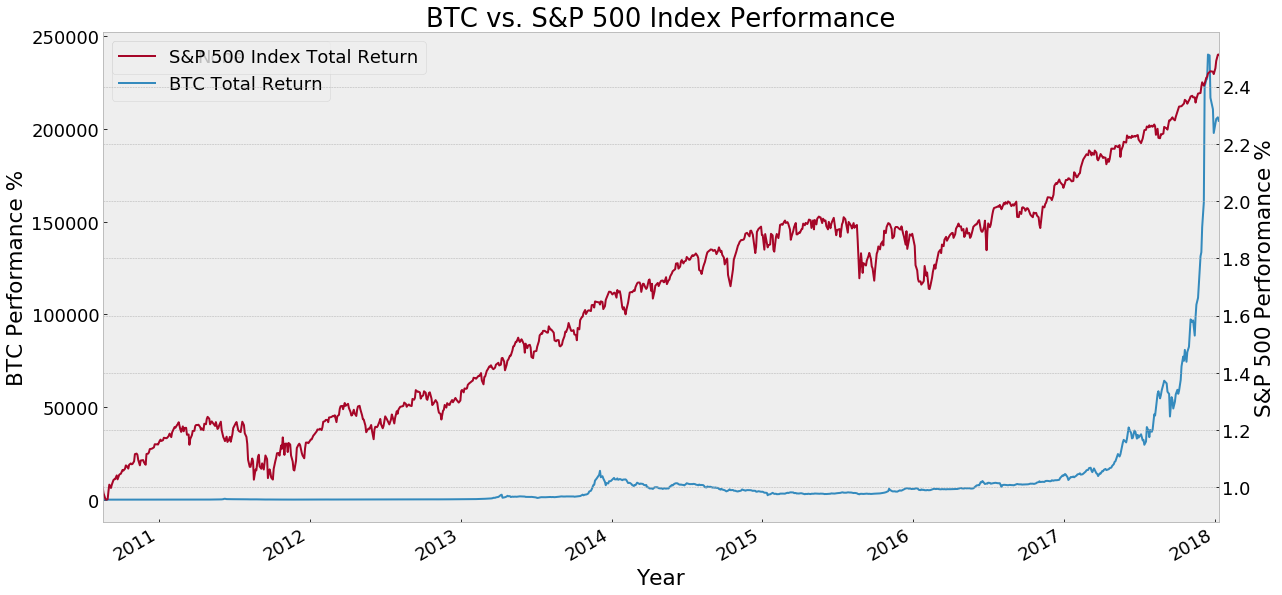

In [10]:
# creating Total Return column for S&P 500

BTC_vol['SP500_TR'] = (sp500['Adj Close']/1094.160034)

BTC_vol.BTC_TR.plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Total Return'])
BTC_vol.SP500_TR.plot(secondary_y=True)
plt.title('BTC vs. S&P 500 Index Performance')
plt.ylabel('S&P 500 Perforomance %')
plt.legend(['S&P 500 Index Total Return'])

plt.show()

With the S&P 500 Performance over the same time period, it is difficult to make out a relationship between the performance of the broader stock market and Bitcoin.  

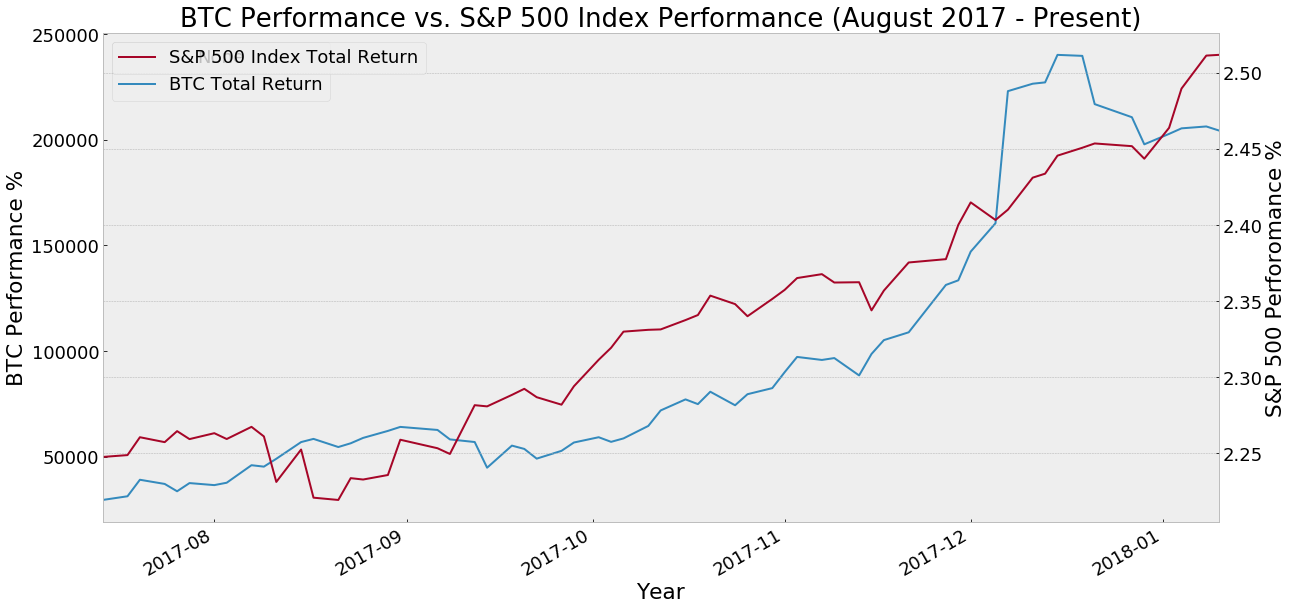

In [11]:
# applying the same post August 2017 methodology here...

BTC_vol.BTC_TR[875:].plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Total Return'])
BTC_vol.SP500_TR[875:].plot(secondary_y=True)
plt.title('BTC Performance vs. S&P 500 Index Performance (August 2017 - Present)')
plt.ylabel('S&P 500 Perforomance %')
plt.legend(['S&P 500 Index Total Return'])

plt.show()


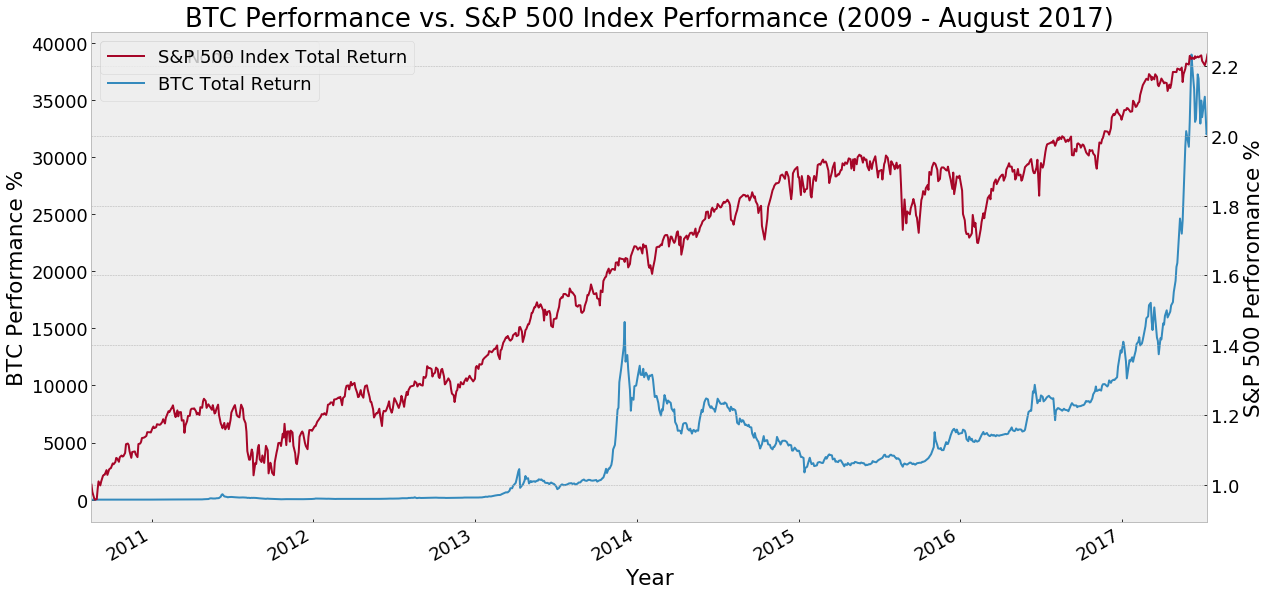

In [12]:
# was it always this way?

BTC_vol.BTC_TR[:875].plot()
plt.ylabel('BTC Performance %')
plt.xlabel('Year')
plt.legend(['BTC Total Return'])
BTC_vol.SP500_TR[:875].plot(secondary_y=True)
plt.title('BTC Performance vs. S&P 500 Index Performance (2009 - August 2017)')
plt.ylabel('S&P 500 Perforomance %')
plt.legend(['S&P 500 Index Total Return'])

plt.show()

In [13]:
from scipy import stats

stats.pearsonr(BTC_vol.BTC_TR, BTC_vol.SP500_TR)

(0.5425587820798331, 7.7736094209797224e-73)

A correlation coefficient of 0.54 and a low P-value suggests a firm, but not strong, correlation.  It is more likely each asset's performance influenced by similar factors (and not solely influenced by each other).  

We must also take into consideration that during this time period, the stock market was recovering from the Great Recession.  This recovery shows that the S&P 500 index increased 2.4x fold during this period (while Bitcoin saw a 225,000x fold increase). 

Another interpretation of the August 2017 - Present plot would be that Bitcoin has become more mainstream. This is especially so relative to the pre-August 2017 plot where Bitcoin performance was not as influenced by the S&P.  

Let us now examine how Gold has fared during the rise of Bitcoin...

In [14]:
# import monthly gold price data from the Wiki Commodity Prices

gold = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\COM-WLD_GOLD.csv''',
                         parse_dates=['Date'], index_col='Date')

gold.columns = ['Price']
gold['Gold_Return'] = (gold['Price']/1117.963)*100

gold.head()

,Price,Gold_Return
Date,,
2010-01-31,1117.963,100.000000
2010-02-28,1095.413,97.982939
2010-03-31,1113.337,99.586212
2010-04-30,1148.688,102.748302
2010-05-31,1205.434,107.824141


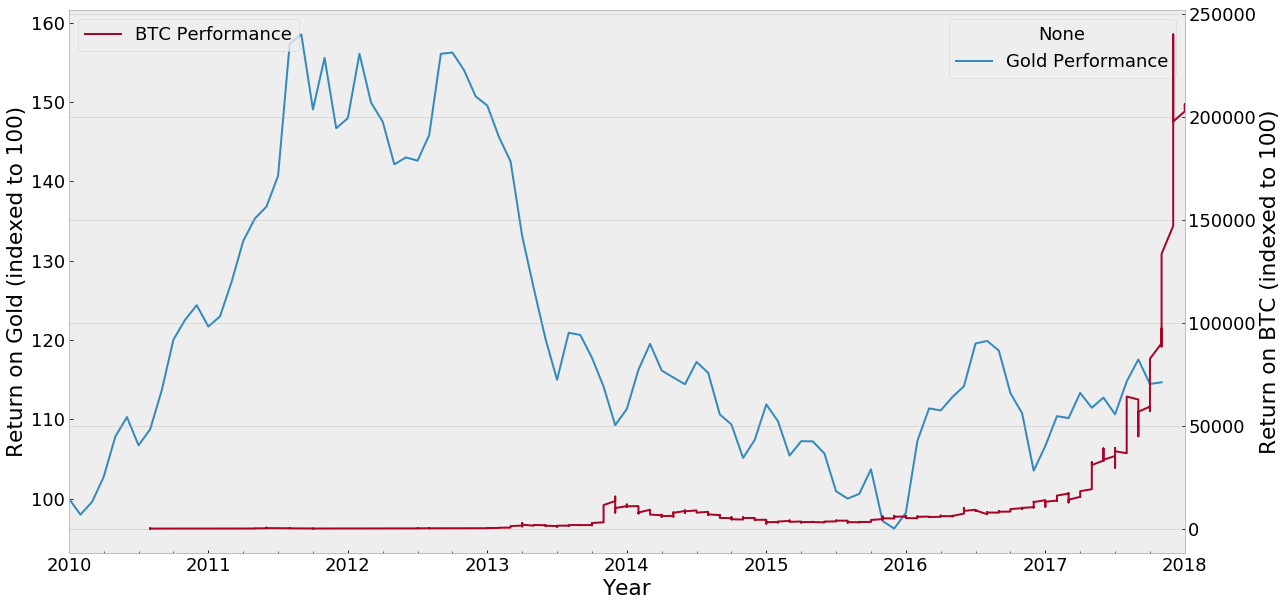

In [15]:
gold.Gold_Return.plot()
plt.xlabel('Year')
plt.ylabel('Return on Gold (indexed to 100)')
plt.legend(['Gold Performance'])
BTC_vol.BTC_TR.plot(secondary_y=True)
plt.ylabel('Return on BTC (indexed to 100)')
plt.legend(['BTC Performance'])
plt.show()

With gold, we see little to suggest a relationship to Bitcoin either historically or as recent as 2016.  

How about another commodity ubiquitious within financial markets, oil?

In [16]:
oil = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\OPEC-ORB.csv''',
                         parse_dates=['Date'], index_col='Date')

oil.sort_index(axis=0, ascending=True, inplace=True)
oil.columns =['Price']
oil['Oil_Return'] = (oil['Price']/73.05)
oil.head()

,Price,Oil_Return
Date,,
2010-08-18,73.05,1.000000
2010-08-19,73.03,0.999726
2010-08-20,71.78,0.982615
2010-08-23,70.93,0.970979
2010-08-24,69.69,0.954004


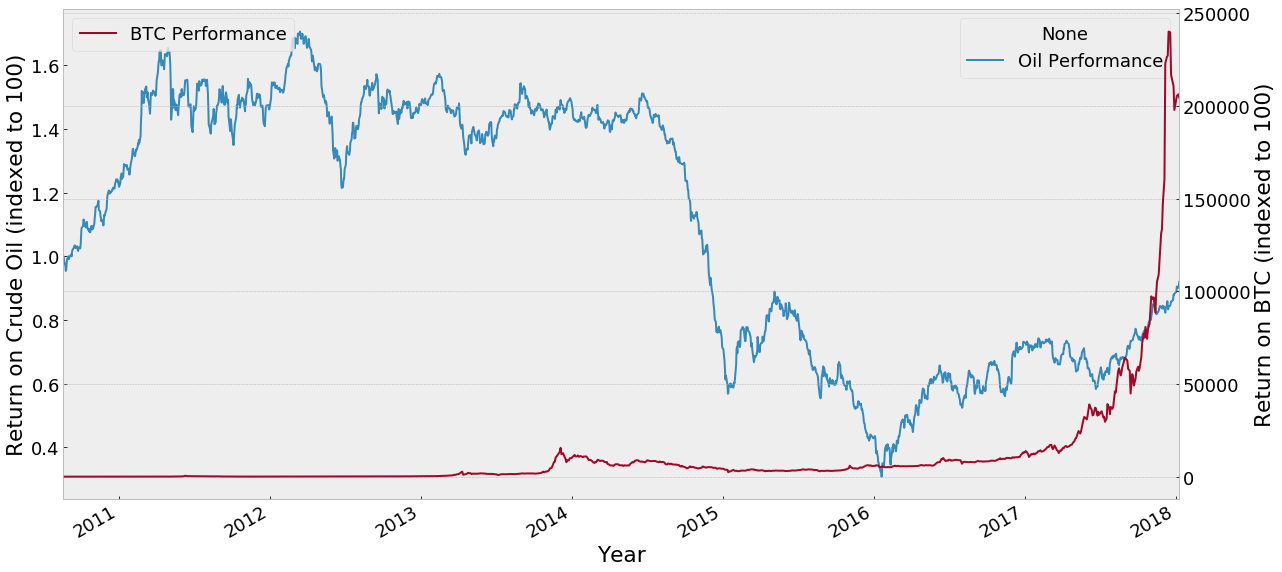

In [17]:
oil.Oil_Return.plot()
plt.xlabel('Year')
plt.ylabel('Return on Crude Oil (indexed to 100)')
plt.legend(['Oil Performance'])
BTC_vol.BTC_TR.plot(secondary_y=True)
plt.ylabel('Return on BTC (indexed to 100)')
plt.legend(['BTC Performance'])
plt.show()

Through visual EDA, we see very little evidence of correlation but let's back this up with numbers and additional visualizations

In [18]:
gold_reindex = gold.Gold_Return/100

combined = pd.concat([BTC_vol.BTC_TR,BTC_vol.VIX_TR, BTC_vol.SP500_TR,gold_reindex, oil.Oil_Return], axis=1)

combined.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1952 entries, NaT to 2018-01-22
Data columns (total 5 columns):
BTC_TR         937 non-null float64
VIX_TR         937 non-null float64
SP500_TR       937 non-null float64
Gold_Return    95 non-null float64
Oil_Return     1919 non-null float64
dtypes: float64(5)
memory usage: 91.5 KB


In [19]:
corrmat = combined.corr()
print(corrmat)
import seaborn as sns

               BTC_TR    VIX_TR  SP500_TR  Gold_Return  Oil_Return
BTC_TR       1.000000 -0.316832  0.542559    -0.334866   -0.250007
VIX_TR      -0.316832  1.000000 -0.618065     0.653232    0.205093
SP500_TR     0.542559 -0.618065  1.000000    -0.785429   -0.730141
Gold_Return -0.334866  0.653232 -0.785429     1.000000    0.724267
Oil_Return  -0.250007  0.205093 -0.730141     0.724267    1.000000


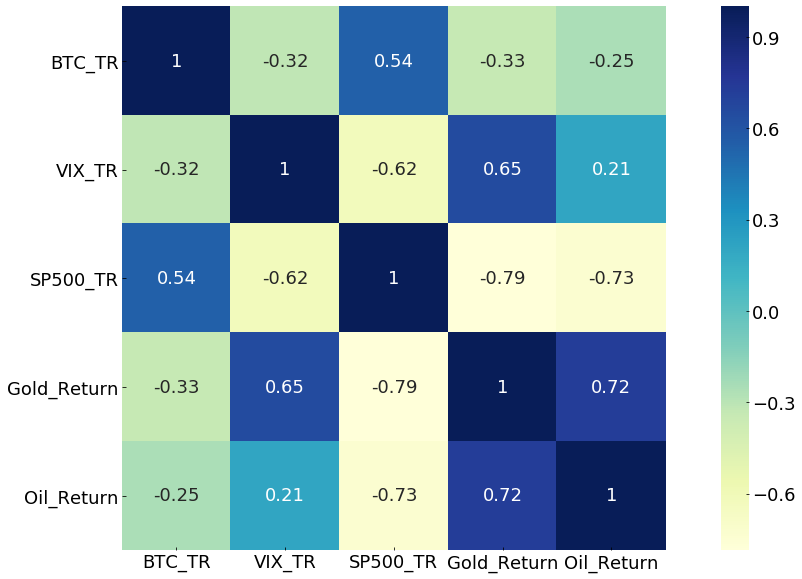

In [20]:
sns.heatmap(corrmat, square=True, vmax=1, annot=True, cmap="YlGnBu")

#### Exploration 4) Analysis:
    
We find little correlation between proxies of traditional financial assets (stocks) and real assets (gold and oil) and Bitcoin's performance.   This implies little relationship to traditional financial products.  

However, it does not mean that Bitcoin does not have a place in a portfolio.  The goal of diversification is to have uncorrelated assets in efforts to reduce risk.  In this respect, Bitcoin may provide an additional source of diversification in a traditional portfolio.  Bitcoin has a medium correlation with the S&P500 but weak negative correlations with the VIX, Gold and Oil (safe-haven assets).  

#### Exploration 5) How would a mock portfolio perform with and without Bitcoin?

I intend to create a mock portfolio with the existing data with risk-tolerant weighting method.  For this exercise, I will create a non-BTC mock portfolio of 75% stocks (S&P 500), 15% VIX, 10% Oil. I will also create 3 portfolios with different Bitcoin weightings (5%, 10% and 25%) and compare the performance.

For the sake of simplicity, I will not be re-weighting the allocations.

In [21]:
port = pd.concat([BTC_vol['BTC_TR'],BTC_vol.VIX_TR, BTC_vol.SP500_TR, oil.Oil_Return], axis=1)
port = port.dropna()

port['port_original'] = port.SP500_TR*.75+port.VIX_TR*.15+port.Oil_Return*.1 #set as the baseline portfolio
port['port_BTC5'] = (port.SP500_TR*.75+port.VIX_TR*.15+port.Oil_Return*.1)*.95+port.BTC_TR*.05
port['port_BTC10'] = (port.SP500_TR*.75+port.VIX_TR*.15+port.Oil_Return*.1)*.90+port.BTC_TR*.10
port['port_BTC25'] = (port.SP500_TR*.75+port.VIX_TR*.15+port.Oil_Return*.1)*.75+port.BTC_TR*.25

port.head()

,BTC_TR,VIX_TR,SP500_TR,Oil_Return,port_original,port_BTC5,port_BTC10,port_BTC25
2010-08-18,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2010-08-20,0.901351,1.036600,0.979464,0.982615,0.988349,0.983999,0.979649,0.966600
2010-08-24,0.903905,1.116714,0.961349,0.954004,0.983920,0.979919,0.975918,0.963916
2010-08-26,0.898635,1.113054,0.957099,0.977413,0.982524,0.978330,0.974135,0.961552
2010-08-30,0.932432,1.106547,0.958653,1.000000,0.984972,0.982345,0.979718,0.971837


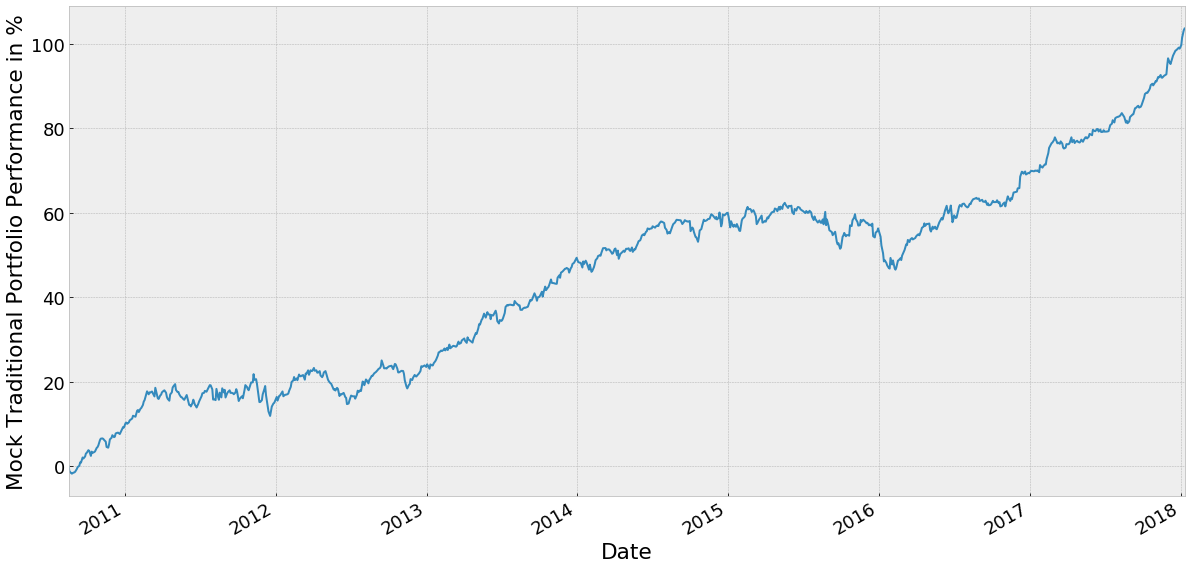

In [22]:
# plotting the original portfolio by itself, indexed to 1

port.port_original.sub(1).mul(100).plot() #plotting in percentages
plt.xlabel('Date')
plt.ylabel('Mock Traditional Portfolio Performance in %')

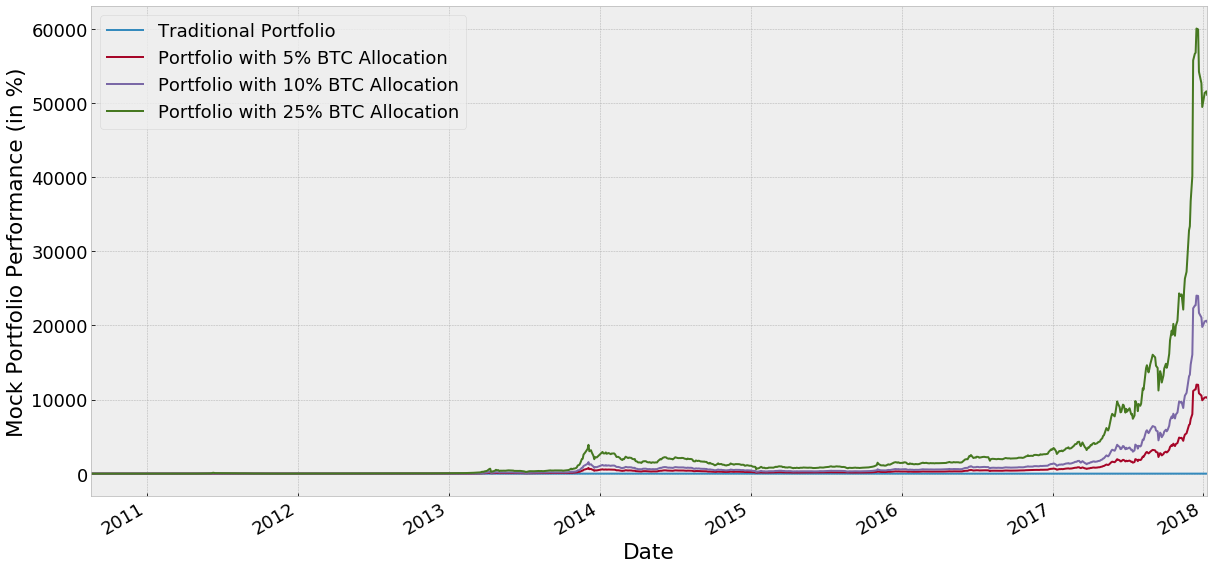

In [23]:
port.port_original.plot()
plt.xlabel('Date')
plt.ylabel('Mock Portfolio Performance (in %)')

port.port_BTC5.plot()
port.port_BTC10.plot()
port.port_BTC25.plot()
plt.legend(['Traditional Portfolio','Portfolio with 5% BTC Allocation', 
            'Portfolio with 10% BTC Allocation', 'Portfolio with 25% BTC Allocation'])

plt.show()

In [24]:
# maybe its easier to visualize the spread

port['Spread_BTC5'] = port.port_BTC5 - port.port_original 
port['Spread_BTC10'] = port.port_BTC10 - port.port_original 
port['Spread_BTC25'] = port.port_BTC25 - port.port_original 

port.tail()

,BTC_TR,VIX_TR,SP500_TR,Oil_Return,port_original,port_BTC5,port_BTC10,port_BTC25,Spread_BTC5,Spread_BTC10,Spread_BTC25
2017-12-29,197839.729730,0.448963,2.443527,0.882546,1.988245,9893.875319,19785.762393,49461.423616,9891.887074,19783.774149,49459.435371
2018-01-02,202781.846847,0.397316,2.463817,0.887611,1.996221,10140.988753,20279.981284,50696.958878,10138.992531,20277.985063,50694.962656
2018-01-04,205396.689189,0.374949,2.489572,0.905270,2.013948,10271.747710,20541.481472,51350.682759,10269.733762,20539.467524,51348.668810
2018-01-08,206296.036036,0.387149,2.511251,0.901437,2.031654,10316.731873,20631.432092,51575.532750,10314.700219,20629.400438,51573.501096
2018-01-10,204410.788288,0.399349,2.511726,0.920465,2.035743,10222.473371,20442.910998,51104.223880,10220.437627,20440.875255,51102.188136


In [25]:
port.describe()

,BTC_TR,VIX_TR,SP500_TR,Oil_Return,port_original,port_BTC5,port_BTC10,port_BTC25,Spread_BTC5,Spread_BTC10,Spread_BTC25
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,10769.979574,0.671078,1.643753,1.100589,1.443535,539.870337,1078.297139,2693.577545,538.426802,1076.853604,2692.134010
std,29107.122090,0.225645,0.382249,0.399318,0.238264,1455.484210,2910.833566,7276.881650,1455.349363,2910.698726,7276.746814
min,0.822973,0.371696,0.957099,0.313347,0.982524,0.978330,0.974053,0.954125,-0.009699,-0.019398,-0.048496
25%,150.385135,0.525214,1.256784,0.693292,1.206215,8.682162,16.136677,38.509168,7.459268,14.918537,37.296341
50%,3307.432432,0.614477,1.710988,1.273101,1.501027,166.875718,332.168176,828.045552,165.292459,330.584917,826.462293
75%,8126.621622,0.748780,1.917370,1.462457,1.599781,407.827605,814.079922,2032.836872,406.252317,812.504633,2031.261583
max,240160.810811,1.750712,2.511726,1.702122,2.035743,12009.917529,24017.859281,60041.684536,12007.941752,24015.883503,60039.708758


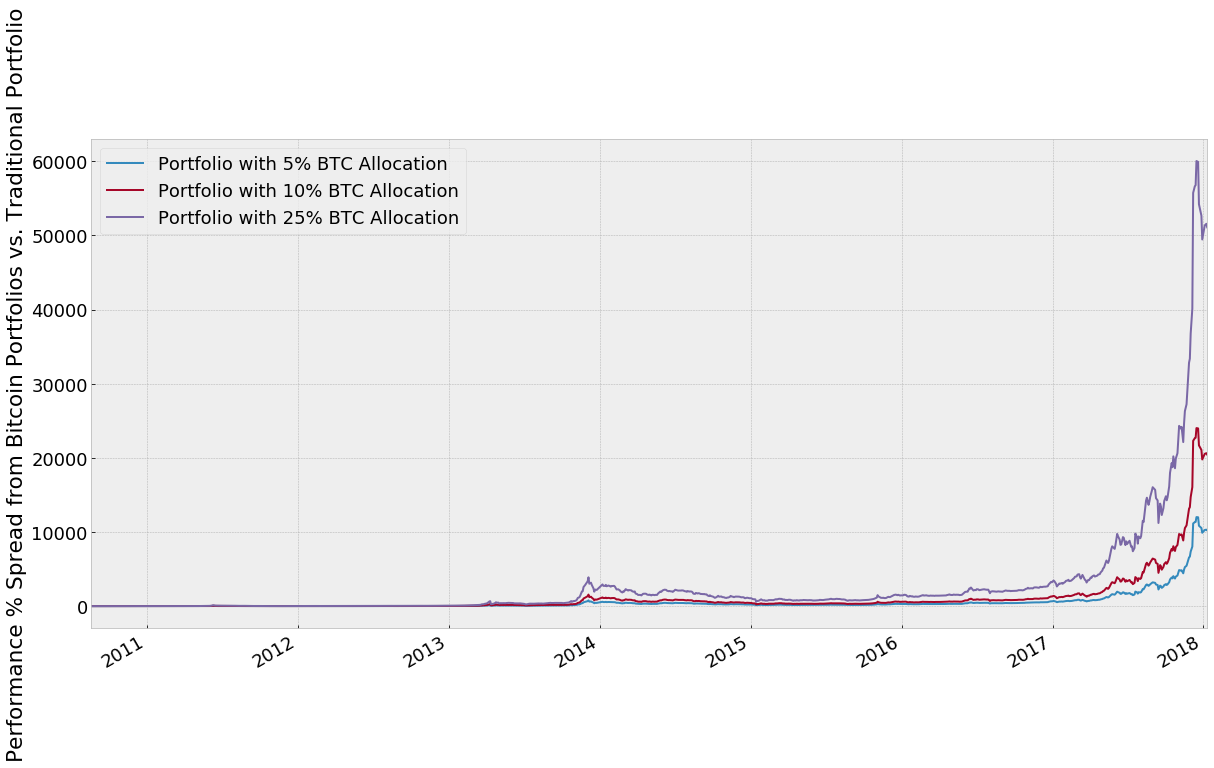

In [26]:
port.Spread_BTC5.plot()
port.Spread_BTC10.plot()
port.Spread_BTC25.plot()
plt.legend(['Portfolio with 5% BTC Allocation', 'Portfolio with 10% BTC Allocation', 
            'Portfolio with 25% BTC Allocation'])
plt.ylabel('Performance % Spread from Bitcoin Portfolios vs. Traditional Portfolio')

plt.show()

In [27]:
# let's look at Sharpe Ratio - defined as Mean Excess Return (BTC_TR less SP500_TR) / Stand deviationg of Mean Excess Return
port['Excess_Return'] = port['BTC_TR'] - port['SP500_TR']
port.describe()

,BTC_TR,VIX_TR,SP500_TR,Oil_Return,port_original,port_BTC5,port_BTC10,port_BTC25,Spread_BTC5,Spread_BTC10,Spread_BTC25,Excess_Return
count,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000,936.000000
mean,10769.979574,0.671078,1.643753,1.100589,1.443535,539.870337,1078.297139,2693.577545,538.426802,1076.853604,2692.134010,10768.335821
std,29107.122090,0.225645,0.382249,0.399318,0.238264,1455.484210,2910.833566,7276.881650,1455.349363,2910.698726,7276.746814,29106.914696
min,0.822973,0.371696,0.957099,0.313347,0.982524,0.978330,0.974053,0.954125,-0.009699,-0.019398,-0.048496,-0.209774
25%,150.385135,0.525214,1.256784,0.693292,1.206215,8.682162,16.136677,38.509168,7.459268,14.918537,37.296341,149.116429
50%,3307.432432,0.614477,1.710988,1.273101,1.501027,166.875718,332.168176,828.045552,165.292459,330.584917,826.462293,3305.544688
75%,8126.621622,0.748780,1.917370,1.462457,1.599781,407.827605,814.079922,2032.836872,406.252317,812.504633,2031.261583,8124.819077
max,240160.810811,1.750712,2.511726,1.702122,2.035743,12009.917529,24017.859281,60041.684536,12007.941752,24015.883503,60039.708758,240158.365273


In [28]:
mean_excess_return = port.Excess_Return.mean()
std_dev_excess_return = port.Excess_Return.std()

sharpe = mean_excess_return / std_dev_excess_return 
print(sharpe)

0.36995799567254867


Sharpe Ratio = 10768.34 / 29106.91 = 0.37.  Sharpe Ratios below 1 are not considered ideal.  Essentially, the ratio implies an average of 0.37% excess return (over the S&P 500) per unity of risk.  In the eyes of most investors, this is not a lucrative trade-off.  


#### Exploration 5) Analysis:

Unsurprisingly, the portfolios with a Bitcoin allocation held from 2010-to-present would have substantially outpeformed a traditional mock portfolio which held no Bitcoin.  

With a 5% allocation to Bitcoin, the portfolio would have outperformed by ~10,000%.
With a 10% allocation to Bitcoin, the portfolio would have outperformed by ~20,000%.
With a 25% allocation to Bitcoin, the portfolio would have outperformed by ~50,000%.

Looking at the raw data, the Bitcoin portfolios actually underperforms the benchmark portfolio for very short periods of time (the BTC-25% portfolio underperforms by as much as 5%).

While it is obvious to have allocated some portion of a portfolio to Bitcoin... should you?

#### Exploration 6) Is there evidence that Bitcoin is in a bubble?

Is Bitcoin price performance remiscent or prior asset bubbles?  I aim to compare BTC's performance against famous examples of asset bubbles (that are the result of market forces and not bolstered by any kind of government or monetary policy).  Here I will make comparisons to the Dot-Com Bubble (1997-2001), Tulipmania (1634-1637), US Housing Bubble (1996-2006).

In [29]:
# importing custom tulip data. Source: http://arno.uvt.nl/show.cgi?fid=129437

tulip = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\tulip.csv''',
                   parse_dates=['Date'], index_col='Date')
                         
tulip.head()

,Tulip_Price_Index
Date,
12-01-1634,22
05-01-1636,61
06-01-1636,38
07-01-1636,51
08-01-1636,61


In [30]:
# importing Nasdaq Index Data from Dot-Com era

dcom = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\Nasdaq_data_dotcom.csv''',
                         parse_dates=['Date'], index_col='Date')

dcom.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-01-02,1292.650024,1293.630005,1272.339966,1280.699951,1280.699951,492350000
1997-01-03,1288.020020,1310.839966,1280.699951,1310.680054,1310.680054,519140000
1997-01-06,1314.339966,1321.469971,1310.630005,1316.400024,1316.400024,588140000
1997-01-07,1316.910034,1327.819946,1312.079956,1327.729980,1327.729980,577740000
1997-01-08,1329.599976,1330.770020,1319.939941,1320.349976,1320.349976,666490000


In [31]:
# importing S&P/Case-Shiller U.S. National Home Price Index from 1996 to 2006
home = pd.read_csv(r'''C:\Users\Garrick\Documents\Springboard\Capstone Project 1\VIX_datasets\CSUSHPINSA.csv''',
                         parse_dates=['DATE'], index_col='DATE')
home.head()

,CSUSHPINSA
DATE,
1996-01-01,81.45
1996-02-01,81.42
1996-03-01,81.69
1996-04-01,82.15
1996-05-01,82.63


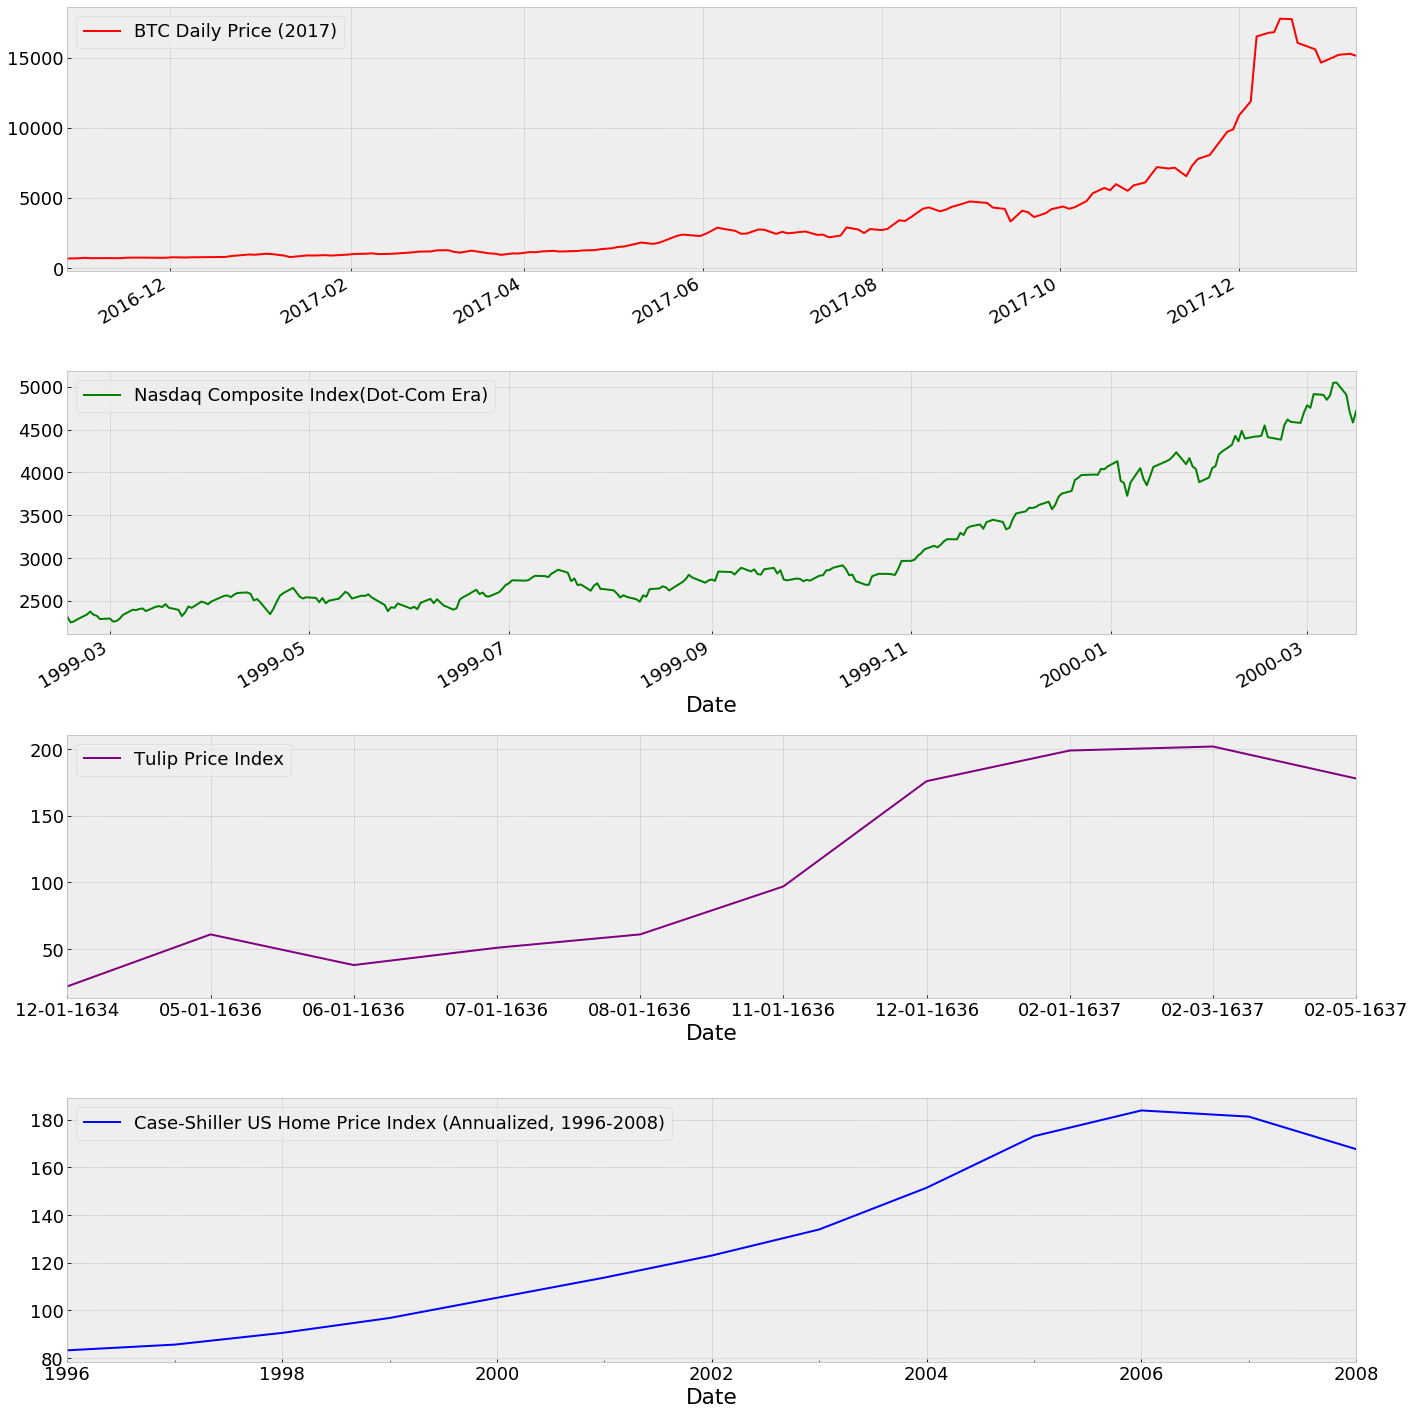

In [70]:
# finally, let's plot the pricing data.

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(20,20))

ax1 = BTC_vol['Price'][-150:].plot(ax=axes[0], color='red') #plotting only 2017-present data
axes[0].legend(['BTC Daily Price (2017)'])

ax2 = dcom['Close'][-475:-200].plot(ax=axes[1], color='green') #plotting only final year data
axes[1].legend(['Nasdaq Composite Index(Dot-Com Era)'])

ax3 = tulip[:-4].plot(ax=axes[2], color='purple') #excluding post-crash prices
axes[2].legend(['Tulip Price Index'])

ax4 = home.resample('A').median().plot(ax=axes[3], color='blue') #data is reported monthly, transformating to match timeline of BTC
axes[3].legend(['Case-Shiller US Home Price Index (Annualized, 1996-2008)'])
ax4.set_xlabel('Date')

plt.tight_layout()

plt.show()

From the above plots, we can spot some obvious trend similarites over each event.  Let's confirm and quantify this by taking a look at the correlations.

In [83]:
# defining functions and samples to use, since I am using the last 150 data points of BTC pricing data, will
# conform all data sets to size 150.

# reshaping Nasdaq data
#dcom_resamp = dcom['Close'][:-100].resample('W').mean()
dcom_resamp = pd.DataFrame(dcom['Close'][-350:-200])

# tulip data can't be manipulated for resampling as pandas doesn't support dates from 1600's
# currently unable to resample the tulip data and will have to leave out of analysis for now


# US housing data does not need to be reshaped

r_1 = stats.pearsonr(dcom_resamp.Close, home.CSUSHPINSA)

print('Pearson R correlation for the Dot-Com and US Housing Bubble: {}'.format(r_1[0]))
print('P-Value: {}'.format(r_1[1]))

Pearson R correlation for the Dot-Com and US Housing Bubble: 0.9550593051516821
P-Value: 4.752761367824139e-80


In [69]:
#computing R coefficient for BTC vs. stock data and BTC vs. US Housing prices

r_2 = stats.pearsonr(dcom_resamp.Close, BTC_vol['Price'][-150:])

r_3 = stats.pearsonr(home.CSUSHPINSA, BTC_vol['Price'][-150:])

print('Pearson R correlation for Bitcoin (2017) and the Dot-Com Bubble: {}'.format(r_2[0]))
print('P-Value: {}'.format(r_2[1]))
print('Pearson R correlation for Bitcoin (2017) and US Housing Bubble: {}'.format(r_3[0]))
print('P-Value: {}'.format(r_3[1]))


Pearson R correlation for Bitcoin (2017) and the Dot-Com Bubble: 0.8527488585004591
P-Value: 1.3770237691042977e-43
Pearson R correlation for Bitcoin (2017) and US Housing Bubble: 0.7525625687801886
P-Value: 1.217934985768466e-28


I would feel comfortable saying that Bitcoin is currently in a bubble , given the strong similarity to asset bubbles in recent history.  It is even more staggering that these are some of the most ubiquitous asset bubbles of modern finance.  However, given Bitcoin small scale relative to say the stock market or US housing, it does not seem the bursting of the Bitcoin bubble would have any economic reprucussions at the same scale as the Dot-Com bust or the Great Recession.  

In [84]:
# instead of p-value, let's find R-squared

slope, intercept, r_value, p_value, std_err = dcom_rsq = stats.linregress(dcom_resamp.Close,BTC_vol['Price'][-150:])
print ("R-squared of BTC and Dot-Com Bubble:", r_value**2)

slope, intercept, r_value, p_value, std_err = dcom_rsq = stats.linregress(home.CSUSHPINSA,BTC_vol['Price'][-150:])
print ("R-squared of BTC and US Housing Bubble:", r_value**2)


R-squared of BTC and Dot-Com Bubble: 0.727180615674
R-squared of BTC and US Housing Bubble: 0.566350419929
